In [1]:
import os
import numpy as np
import yaml
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from classical_solvers.solver_benchmark import SolverBenchmark

In [2]:
def run_benchmark(solver):
    benchmark_results = []
    with tqdm(total=len(solver.nx_list), desc=f"Running {solver.name} Benchmark") as pbar:

        if solver.traversal_method == 'nested':
            for nx in solver.nx_list:
                for ny in solver.ny_list:
                    pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                    solver.run(nx, ny)
                    pbar.update(1)
        elif solver.traversal_method == 'zip':
            for nx, ny in zip(solver.nx_list, solver.ny_list):
                pbar.set_description(f"Solver: {solver.name}, Size: nx={nx}, ny={ny}")
                solver.run(nx, ny)
                pbar.update(1)
    return benchmark_results

Solver: simulated_annealing, Size: nx=5, ny=5: 100%|██████████| 1/1 [00:00<00:00, 51.45it/s]


/Users/azhutov/.virtualenvs/cspraa/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/azhutov/.virtualenvs/cspraa/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


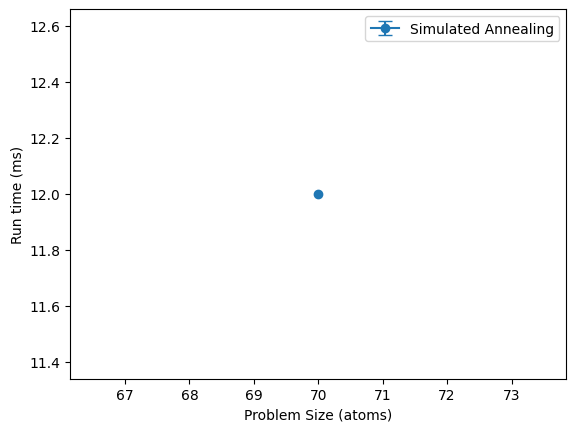

In [3]:
simulated_annealing_config = {
    "name": "simulated_annealing",
    "executable": "./simulated_annealing/simulated_annealing",
    "nx_list": [5],
    "ny_list": [5],
    "crystals_directory": '../native_crystal_database/benchmark_crystals/simulated_annealing/',
    "solutions_directory": './simulated_annealing/solutions',
    "benchmark_file_path": './simulated_annealing_optimization.csv',
    "repetitions": 10,
    "iterations": 1e3,
    "traversal_method": 'zip'
}


solver = SolverBenchmark(**simulated_annealing_config)
solver.generate_problems()
run_benchmark(solver)

# Load benchmark results from the correct file
df = pd.read_csv(simulated_annealing_config['benchmark_file_path'])
stats_df = df.groupby('problem_size')['runtime'].agg(['mean', 'std']).reset_index()

# Plotting the results
fig, ax = plt.subplots()
ax.errorbar(stats_df['problem_size'], stats_df['mean'], yerr=stats_df['std'], label='Simulated Annealing', fmt='-o', capsize=5)

ax.set_xlabel('Problem Size (atoms)')
ax.set_ylabel('Run time (ms)')
ax.legend()
plt.show()

In [4]:
def load_solution(solutions_directory, crystal_name_format, nx, ny, solution_file_extension='yaml'):
    filepath = os.path.join(solutions_directory, f"{crystal_name_format.format(nx=nx, ny=ny)}_solution.{solution_file_extension}")
    if not os.path.exists(filepath): raise FileNotFoundError(filepath)
    with open(filepath, 'r') as f: return yaml.safe_load(f)


relative_error = abs(solution['ground_state_energy'] - solution['energy']) / abs(solution['ground_state_energy'])
print(f"Ground state energy: {solution['ground_state_energy']}")
print(f"Energy: {solution['energy']}")
print(f"Relative error: {relative_error:0.3f}")

Ground state energy: -9.4
Energy: -9.4
Relative error: 0.000
